<a href="https://colab.research.google.com/github/GabrielBMiranda/ELM_Study/blob/main/%5BGBM%5DELM_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tópicos em Aprendizado de Máquina 2017.3

## Comparação de Classificadores e estudo de Máquinas de Aprendizado Extremo (ELM)


### Introdução

Máquinas de Aprendizado Extremo (ELM) são redes neurais com uma única ou várias camadas de nós ocultos, onde os parâmetros dos nós ocultos não precisam ser ajustados. A ideia que sustenta sua criação se trata do Teorema da Aproximação Universal.

##### Base de Dados do problema do reconhecedor digital de dígitos manuscritos MNIST.
A base de dados contém uma série de imagens monocromáticas ** 28px28p ** de dígitos manuscritos, em cada linha do conjunto de dados armazenado como um vetor com 784 valores, cada um representando um valor de pixel, os dados de treinamento possuem uma coluna adicional contendo a label associado àquela amostra.


### Motivação

A escolha da base de dados foi feita em razão da familiaridade do autor com a mesma e devido a sua exigência em uma alta precisão é para credibilidade em um algoritmo de classificação e ser visualmente interessante de se trabalhar.

A escolha do classificador foi devido a um interesse pessoal em implementar a máquina de aprendizado extremo e comparar seus resultados que apesar de ser uma técnica simples apresenta bons resultados com baixo custo computacional.

In [19]:
!pip install latex

  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7606 sha256=ad8df9649969c126fb284b428bc28e045db17a142ec84b87029ba4672f950650
  Stored in directory: /root/.cache/pip/wheels/57/d6/11/5d5718227890d9e479b6137cb406410c37a0b84b2ab35b872b
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7245 sha256=34f1a43b010dab803279a5d986fa70665aebabe1d51ddaf3ebe50dc40912dc48
  Stored in directory: /root/.cache/pip/wheels/28/76/4b/7db27e02c1de4d2181559d108fcdfed1680ff7d3534553d460
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2782 sha256=603a55132232621e268ae138eaddd119cb520fa739116ad7ae5a349208e02759
  Stored in directory: /root/.cache/pip/wheels/4c/c0/ce/5a47f35186acbe73e38811df30daaf798c81a7599bb2d5995a
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.whl size=2213 sha256=ea9a92b625c18a05cd5ab4c1aea3044e2b18ab36f75615169dedbfc0f5f3b735
  Stored in directory: /root/.cache/pip/wheels/7a/f1/d7/124b54c21a9ba4973bc60fc

In [40]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('grayscale') 
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from sklearn.datasets import fetch_openml
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

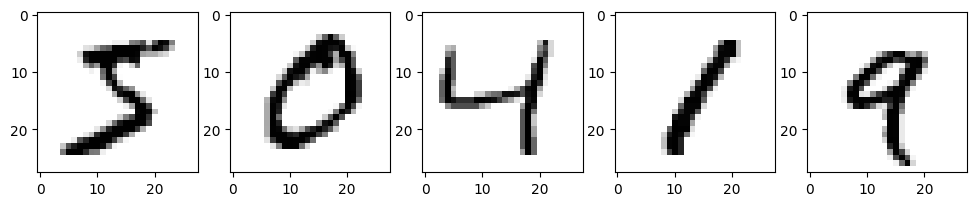

In [24]:
# Apresentando a cara do conjunto de dados

fig = plt.figure(figsize=(12, 12))
for i in range(5):
    fig.add_subplot(1, 5, i+1)
    # plt.title("Label: " + str(labels[i]) )
    plt.imshow(X[i].reshape(28, 28), cmap='gist_yarg')

In [43]:
# One Hot Encode

labels = list(map( int , Y))

n_classes = 10 
y_train = np.zeros([len(labels), n_classes])
for i in range(len(labels)):
        y_train[i,labels[i]] = 1
y_train.view(type=np.matrix)

# Separação os dados de treino em treino e teste utilizando aproximadamente 10% dos dados de treino para teste.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, labels_train, labels_test = train_test_split(X, y_train, labels, test_size=0.1)
print("Tamanho de treino: " + str(x_train.shape[0]) + " || Tamanho de teste: " + str(x_train.shape[0]) )

Tamanho de treino: 63000 || Tamanho de teste: 63000


In [34]:
# Variáveis para armazenamento de tempo de treinamento e acurácia das diferentes técnicas a se adotar

clfs   = []
timess = []
scores = []

## Árvore de Decisão (Tree)

[https://scikit-learn.org/stable/modules/tree.html]

In [44]:
from sklearn.tree import DecisionTreeClassifier

clfs.append("Tree")
clf = DecisionTreeClassifier()

ini = time.time()
clf.fit(x_train, labels_train)
end = time.time()

score = clf.score(x_test, labels_test)

timess.append(end-ini)
scores.append(score)

print("Acurácia: \t" + str(score) )
print("Tempo: \t\t" + str(end-ini) + " (s)" )

Acurácia: 	0.8745714285714286
Tempo: 		24.44659948348999 (s)


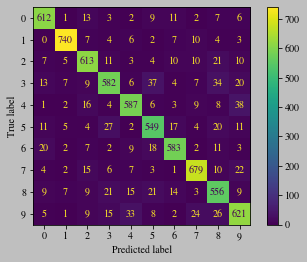

In [59]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_pred, labels_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

## Análise Discriminante Linear (LDA)

[https://scikit-learn.org/stable/modules/lda_qda.html]

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clfs.append("LDA")
clf = LinearDiscriminantAnalysis()

ini = time.time()
clf.fit(x_train, labels_train)
end = time.time()
clf.score(x_test, labels_test)

score = clf.score(x_test, labels_test)

timess.append(end-ini)
scores.append(score)

print("Acurácia: \t" + str(score) )
print("Tempo: \t\t" + str(end-ini) + " (s)" )

Acurácia: 	0.8671428571428571
Tempo: 		16.711268186569214 (s)


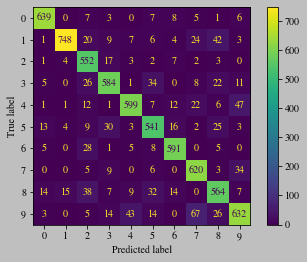

In [61]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_pred, labels_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

## Máquina de Vetor Suporte (SVC)

[https://scikit-learn.org/stable/modules/svm.html]

In [62]:
from sklearn.svm import SVC

clfs.append("SVC")
clf = SVC()

ini = time.time()
clf.fit(x_train, labels_train)
end = time.time()
clf.score(x_test, labels_test)

score = clf.score(x_test, labels_test)

timess.append(end-ini)
scores.append(score)

print("Acurácia: \t" + str(score) )
print("Tempo: \t\t" + str(end-ini) + " (s)" )



Acurácia: 	0.98
Tempo: 		297.7849748134613 (s)


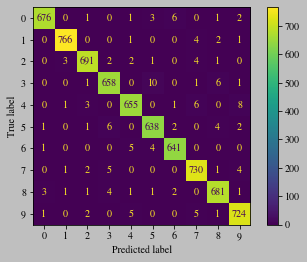

In [63]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_pred, labels_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

## Naive Bayes (NB)

[https://scikit-learn.org/stable/modules/naive_bayes.html]

In [64]:
from sklearn.naive_bayes import GaussianNB

clfs.append("NB")
clf = GaussianNB()

ini = time.time()
clf.fit(x_train, labels_train)
end = time.time()
clf.score(x_test, labels_test)

score = clf.score(x_test, labels_test)

timess.append(end-ini)
scores.append(score)

print("Acurácia: \t" + str(score) )
print("Tempo: \t\t" + str(end-ini) + " (s)" )

Acurácia: 	0.5542857142857143
Tempo: 		1.1293079853057861 (s)


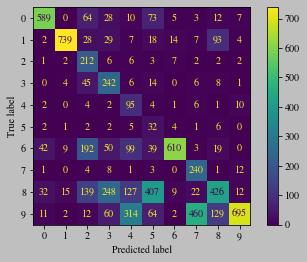

In [65]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_pred, labels_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

## Máquina de Aprendizado Extremo (ELM)
#### Teorema da aproximação universal:
##### "Uma rede neural pré-alimentada com uma única camada oculta pode representar qualquer função contínua, dado um número suficiente de neurônios."

[https://towardsdatascience.com/introduction-to-extreme-learning-machines-c020020ff82b]

$$X \cdot \Theta = y$$


In [67]:
n_units = 1000      # Número de neurônios na camada oculta
clfs.append("ELM")

def elm_layer(x, Theta):
    a = np.dot(x, Theta)
    a = np.maximum(a, 0, a)                     # Funcão de ativação ReLU
    return a

def elm_fit(x, n_hidden):
    Theta_in = np.random.normal( size=[x.shape[1], n_hidden] )  # inicializacao dos pesos da camada de entrada aleatoriamente

    X_hidden = elm_layer(x, Theta_in)           # X                         || Saída da camada oculta
    X_hidden_t = np.transpose(X_hidden)         # X^T
    lsX = np.dot(X_hidden_t, X_hidden)          # lsX  = X^T * X
    Beta = np.dot(X_hidden_t, y_train)          # Beta = X^T * y
    Theta_out = np.linalg.solve(lsX, Beta)      # Theta = lsX^{-1} * Beta

    return Theta_in, Theta_out

def elm_predict( x, Theta_in, Theta_out ):
    a = elm_layer(x, Theta_in)         # Primeira camada
    y = np.dot(a, Theta_out)    # Segunda camada
    return y

def elm_score( x, y, Theta_in, Theta_out ):
    prediction = elm_predict(x, Theta_in, Theta_out)
    correct = 0
    for i in range( x.shape[0] ):
        predicted = np.argmax(prediction[i])
        correct = correct + (1 if predicted == labels_test[i] else 0)
    score = correct/len(y)
    return score

ini = time.time()
Theta_in, Theta_out = elm_fit( x_train, n_units )
end = time.time()

score = elm_score(x_test, labels_test, Theta_in, Theta_out)

timess.append(end-ini)
scores.append(score)

print("Acurácia: \t" + str(score) )
print("Tempo: \t\t" + str(end-ini) + " (s)" )



Acurácia: 	0.9428571428571428
Tempo: 		6.116034269332886 (s)


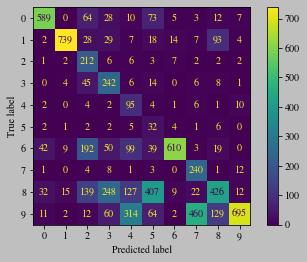

In [68]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_pred, labels_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

## Comparação dos diferentes Classificadores Utilizados

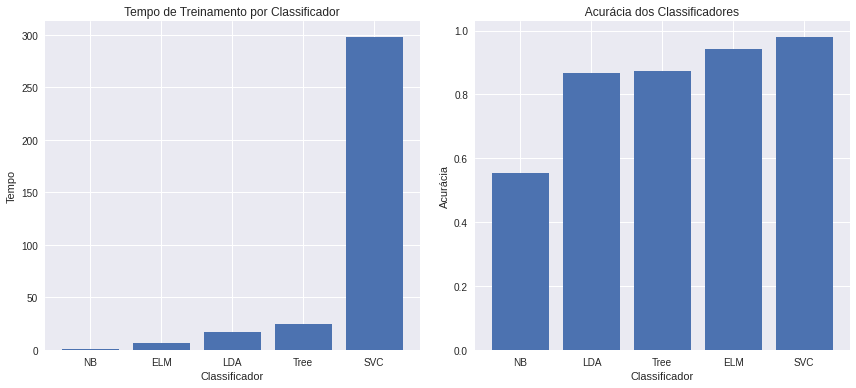

In [78]:

df = pd.DataFrame( data = {'Nome': clfs, 'Tempo': timess, 'Acuracia': scores} )

matplotlib.style.use('seaborn') 

fig, ((ax1, ax2))  = plt.subplots(1, 2)

df = df.sort_values(by=['Tempo'])
ax1.bar( df.Nome, df.Tempo )
ax1.set_xlabel("Classificador")
ax1.set_ylabel("Tempo")
ax1.set_title(" Tempo de Treinamento por Classificador ")

df = df.sort_values(by=['Acuracia'])
ax2.bar( df.Nome, df.Acuracia )
ax2.set_xlabel("Classificador")
ax2.set_ylabel("Acurácia")
ax2.set_title(" Acurácia dos Classificadores ")

plt.tight_layout( rect=[None, 0 , 1.5, 1. ] )
plt.show()

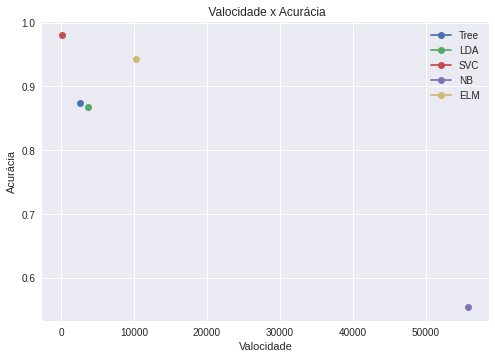

In [79]:

for i in range(len(df)):
    plt.plot( x_train.shape[0]/df.Tempo[i], df.Acuracia[i], marker='o', label=df.Nome[i] )

plt.xlabel("Valocidade")
plt.ylabel("Acurácia")
plt.title(" Valocidade x Acurácia")

plt.legend()
plt.grid(True)
plt.show()

## Evolução da ELM com o aumento de nerônios

In [80]:
elm_timess = []
elm_scores = []
elm_sizes  = []

for i in range(5):
    ini = time.time()
    Theta_in, Theta_out = elm_fit( x_train, 500*2**(i) )
    end = time.time()
    
    score = elm_score(x_test, labels_test, Theta_in, Theta_out)
    
    elm_sizes.append(500*2**(i))
    elm_timess.append(end-ini)
    elm_scores.append(score)

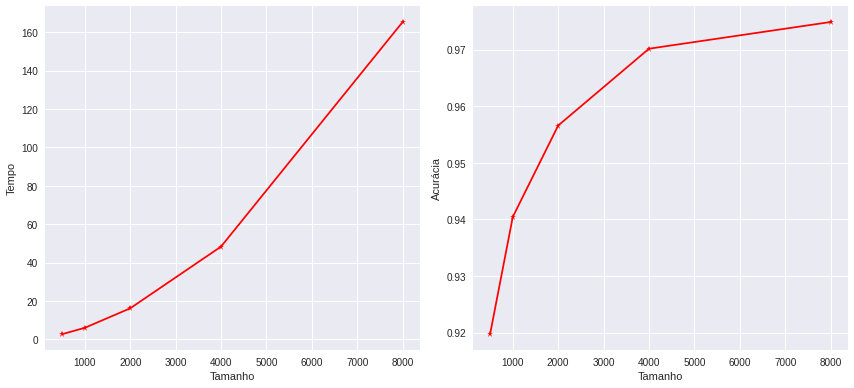

In [81]:

fig, ((ax1, ax2))  = plt.subplots(1, 2)
ax1.plot(elm_sizes, elm_timess, marker='*', color='red' )
ax1.set_xlabel('Tamanho')
ax1.set_ylabel('Tempo')

ax2.plot(elm_sizes, elm_scores, marker='*', color='red' )
ax2.set_xlabel('Tamanho')
ax2.set_ylabel('Acurácia')

plt.tight_layout( rect=[None, 0 , 1.5, 1. ] )
plt.show()

### Conclusões

Podemos observar a qualidade da ELM diante de outros classificadores visto seu baixo tempo de treinamento e alta acurácia obtida. Apesar das escolhas limitadas de classificadores temos resultados consideráveis dessa técnica. Outro ponto a se destacar são os resultados da matriz de confusão que ilustra a precisão e revocação do método ilustrando na matriz o número de verdadeiros/falsos positivos/negativos.

Os resultados finais apresentam um estudo de região ótima para a relação tempo x acurácia para este problema, sendo algo entre 3000 ~ 4000 neurônios na camada oculta.

Por fim, além de trazer a consideração de se estudar um classificador simples como ELM para trabalhos científicos é percebido que o mesmo também pode ser uma `ótima opção de algoritmo para realizar o ensino de técnicas de redes neurais`, principalmente por diferir de exemplos mais comuns que utilizam o backpropagation.
